<a href="https://colab.research.google.com/github/r0cketr1kky/COVID-19_X-Ray/blob/master/ScoreCAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scam-net-rewintous

In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [3]:
%tensorflow_version 1.x

import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Dropout, AvgPool2D
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

TensorFlow 1.x selected.


Using TensorFlow backend.


In [13]:
train_datagen = ImageDataGenerator(rescale=1/255,
  rotation_range=20,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	horizontal_flip=True,
	fill_mode="nearest")
validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        '/gdrive/My Drive/dataset',  
        target_size=(400,400),
        batch_size=32,
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        '/gdrive/My Drive/Validation',  
        target_size=(400,400), 
        batch_size=16,
        class_mode='categorical')


Found 44 images belonging to 2 classes.
Found 6 images belonging to 2 classes.


In [0]:
model = Sequential()
model.add(Conv2D(16, (3,3), input_shape=(400,400,3), activation="relu"))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(32, (3,3), activation="relu"))
model.add(Dropout(0.5))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(Dropout(0.5))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(Dropout(0.5))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(Dropout(0.5))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

In [15]:
import tensorflow as tf
gpu_options = tf.GPUOptions(allow_growth=True)
session = tf.InteractiveSession(config=tf.ConfigProto(gpu_options=gpu_options))
'''
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(AvgPool2D((4,4)))
model.add(Flatten())
model.add(Dense(4096,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(4096 ,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(2, activation="softmax"))


'''
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 398, 398, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 199, 199, 16)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 197, 197, 32)      4640      
_________________________________________________________________
dropout_6 (Dropout)          (None, 197, 197, 32)      0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 96, 96, 64)        18496     
_________________________________________________________________
dropout_7 (Dropout)          (None, 96, 96, 64)       

/tensorflow-1.15.2/python3.6/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [0]:
input_shape = (400, 400)
conv_layers = model.layers[-7].output
softmax_output = model.layers[-1].output

In [17]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=24,  
      epochs=10,
      validation_data = validation_generator)

Epoch 1/10
24/24 [==============================] - 27s 1s/step - loss: 1.0247 - acc: 0.5400 - val_loss: 0.6924 - val_acc: 0.5000
Epoch 2/10
24/24 [==============================] - 26s 1s/step - loss: 0.4637 - acc: 0.8182 - val_loss: 0.6513 - val_acc: 0.6667
Epoch 3/10
24/24 [==============================] - 26s 1s/step - loss: 0.3381 - acc: 0.8742 - val_loss: 0.6694 - val_acc: 0.6667
Epoch 4/10
24/24 [==============================] - 26s 1s/step - loss: 0.2195 - acc: 0.9280 - val_loss: 0.6648 - val_acc: 0.6667
Epoch 5/10
24/24 [==============================] - 26s 1s/step - loss: 0.2672 - acc: 0.8936 - val_loss: 0.6135 - val_acc: 0.6667
Epoch 6/10
24/24 [==============================] - 26s 1s/step - loss: 0.2480 - acc: 0.9045 - val_loss: 0.6456 - val_acc: 0.6667
Epoch 7/10
24/24 [==============================] - 26s 1s/step - loss: 0.1786 - acc: 0.9307 - val_loss: 0.6610 - val_acc: 0.6667
Epoch 8/10
24/24 [==============================] - 26s 1s/step - loss: 0.1310 - acc: 0.94

In [0]:
from keras_applications.vgg16 import preprocess_input
from keras_preprocessing.image import load_img, img_to_array

source_img = load_img('/gdrive/My Drive/covid-chestxray-dataset/images/streptococcus-pneumoniae-pneumonia-temporal-evolution-1-day3.jpg', target_size=input_shape)
img = img_to_array(source_img)
img = np.expand_dims(img, axis=0)
img = preprocess_input(img, backend=keras.backend)

In [0]:
from scam.keras import ScoreCAM
scoreCAM = ScoreCAM(model_input=model.input, last_conv_output=conv_layers, softmax_output=softmax_output, input_shape=input_shape)
scoreCAM.prepare_cam(img)

In [0]:
import matplotlib.pyplot as plt


def draw_original_and_heatmap(class_id):
    heatmap = scoreCAM.get_class_heatmap(class_id)
    f = plt.figure(figsize=(8,8))
    left = f.add_subplot(131)
    left.set_title("Original image")
    left.axis('off')
    left.imshow(source_img)
    
    right = f.add_subplot(132)    
    right.set_title("Heatmap for class {}".format(class_id))
    right.axis('off')
    right.imshow(heatmap, cmap='plasma')
    
    merged = f.add_subplot(133)    
    merged.set_title("Overlay for class {}".format(class_id))
    merged.axis('off')
    merged.imshow(source_img, alpha=0.5)
    merged.imshow(heatmap, cmap='plasma', alpha=0.5)

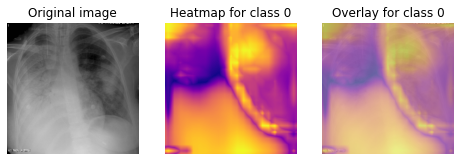

In [21]:
draw_original_and_heatmap(0)

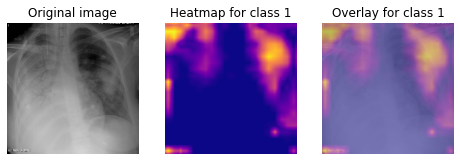

In [22]:
draw_original_and_heatmap(1)

In [0]:
source_img = load_img('/gdrive/My Drive/covid-chestxray-dataset/images/1-s2.0-S1684118220300682-main.pdf-002-a1.png', target_size=input_shape)
img = img_to_array(source_img)
img = np.expand_dims(img, axis=0)
img = preprocess_input(img, backend=keras.backend)

In [0]:
scoreCAM = ScoreCAM(model_input=model.input, last_conv_output=conv_layers, softmax_output=softmax_output, input_shape=input_shape)
scoreCAM.prepare_cam(img)

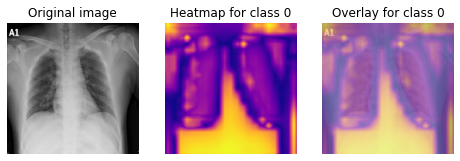

In [25]:
draw_original_and_heatmap(0)

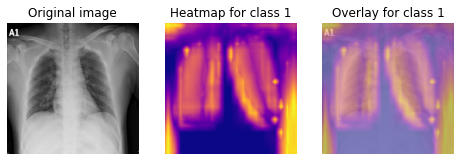

In [26]:
draw_original_and_heatmap(1)

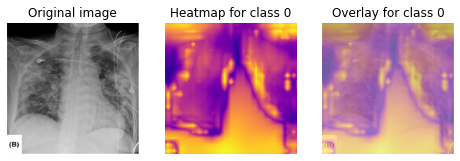

In [30]:
source_img = load_img('/gdrive/My Drive/covid-chestxray-dataset/images/all14238-fig-0001-m-b.jpg', target_size=input_shape)
img = img_to_array(source_img)
img = np.expand_dims(img, axis=0)
img = preprocess_input(img, backend=keras.backend)

scoreCAM = ScoreCAM(model_input=model.input, last_conv_output=conv_layers, softmax_output=softmax_output, input_shape=input_shape)
scoreCAM.prepare_cam(img)

draw_original_and_heatmap(0)

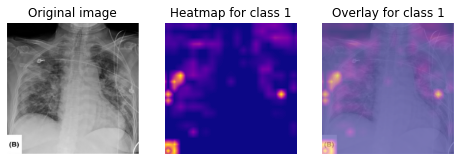

In [31]:
draw_original_and_heatmap(1)

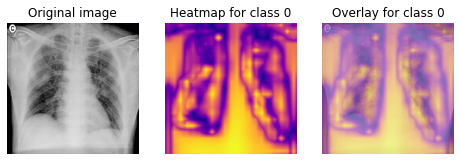

In [32]:
source_img = load_img('/gdrive/My Drive/covid-chestxray-dataset/images/jkms-35-e79-g001-l-c.jpg', target_size=input_shape)
img = img_to_array(source_img)
img = np.expand_dims(img, axis=0)
img = preprocess_input(img, backend=keras.backend)

scoreCAM = ScoreCAM(model_input=model.input, last_conv_output=conv_layers, softmax_output=softmax_output, input_shape=input_shape)
scoreCAM.prepare_cam(img)

draw_original_and_heatmap(0)

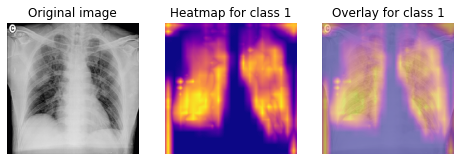

In [33]:
draw_original_and_heatmap(1)